In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [2]:
data = pd.read_csv(r'C:\Users\hp\galon.csv')

In [3]:
data.isnull().sum()

created_at         636
text               636
author.username    636
dtype: int64

In [4]:
data = data.dropna()
data.isnull().sum()

created_at         0
text               0
author.username    0
dtype: int64

In [5]:
data.columns = ['created', 'text', 'username']

# Data Cleansing

In [6]:
import re
import string 

In [7]:
def cleaningTweet(tweet):
    #mengecilkan huruf
    tweet = tweet.lower()
    #menghapus @username
    tweet = re.sub('@[\w]*','',tweet)
    #trim
    tweet = tweet.replace("\\n", ' ')
    #menghapus url
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','',tweet)

    #menghapus karakter tidak diperlukan
    tweet = re.sub('[''""#!$%&()*+,-./:;<=>?@[\]^_`{|}~]','',tweet)
    #menghapus angka
    tweet = re.sub('\d+', '', tweet)
    #remove emoji
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
                           "]+", flags=re.UNICODE)
    tweet = emoji_pattern.sub(r'', tweet)
    return tweet

In [8]:
data.loc[:, 'text']=data.loc[:, 'text'].apply(lambda x : cleaningTweet(x))

In [9]:
data.head()

,created,text,username
1,2021-12-16T14:36:57.000Z,please galon sekali pakai itu malah jadi namba...,pahlevy004
3,2021-12-16T14:36:38.000Z,galon sekali pakai gapernah tuh berserakan,maukwetiau
5,2021-12-16T14:36:34.000Z,pttirta frisindo stop produksi galon sekali pa...,andibayy
7,2021-12-16T14:35:43.000Z,sudahlah galon sekali pakai lebih ramah lingk...,maukwetiau
9,2021-12-16T14:34:10.000Z,seandainya semua perusahaan air mineral gunaka...,Rb_Kustiadi


In [10]:
import nltk
from nltk.tokenize import word_tokenize 
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
def tokenizing_word(tweet):
    return word_tokenize(tweet)

In [12]:
data.loc[:, 'text']=data.loc[:, 'text'].apply(lambda x : tokenizing_word(x))

In [13]:
data.head()

,created,text,username
1,2021-12-16T14:36:57.000Z,"[please, galon, sekali, pakai, itu, malah, jad...",pahlevy004
3,2021-12-16T14:36:38.000Z,"[galon, sekali, pakai, gapernah, tuh, berserakan]",maukwetiau
5,2021-12-16T14:36:34.000Z,"[pttirta, frisindo, stop, produksi, galon, sek...",andibayy
7,2021-12-16T14:35:43.000Z,"[sudahlah, galon, sekali, pakai, lebih, ramah,...",maukwetiau
9,2021-12-16T14:34:10.000Z,"[seandainya, semua, perusahaan, air, mineral, ...",Rb_Kustiadi


# Normalization

In [14]:
kamus = pd.read_csv(r'C:\Users\hp\kamus.csv')
kamus.head()

,sebelum,sesudah
0,7an,tujuan
1,@,di
2,ababil,abg labil
3,abis,habis
4,acc,accord


In [15]:
normalizad_word_dict = {}

for index, row in kamus.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1]

In [16]:
def normalized_term(tweet):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in tweet]

In [17]:
data['text']=data['text'].apply(lambda x : normalized_term(x))

In [18]:
for word in enumerate(data['text']):
    print(word)

(0, ['please', 'galon', 'sekali', 'pakai', 'itu', 'bahkan', 'jadi', 'nambah', 'sampah', 'saya', 'harap', 'indonesia', 'mulai', 'produksi', 'bioplastik', 'yang', 'lebih', 'ramah', 'lingkungan', 'savetheearth', 'aquarusaklingkungan', 'tolakgalonsekalipakai'])
(1, ['galon', 'sekali', 'pakai', 'gapernah', 'itu', 'berserakan'])
(2, ['pttirta', 'frisindo', 'henti', 'produksi', 'galon', 'sekali', 'pakai', 'tolakgalonsekalipakai', 'tandatangani', 'petisi', 'lewat'])
(3, ['sudahlah', 'galon', 'sekali', 'pakai', 'lebih', 'ramah', 'lingkungan'])
(4, ['seandainya', 'semua', 'perusahaan', 'air', 'mineral', 'gunakan', 'galon', 'sekali', 'pakai', 'kebayang', 'tidak', 'siih', 'dampak', 'pada', 'lingkungan', 'tolakgalonsekalipakai'])
(5, ['wah', 'iya', 'kalau', 'tidak', 'pernah', 'beli', 'galon', 'sekali', 'pakai', 'iya', 'yang', 'mau', 'berkreatif', 'silakan', 'kok', 'it', "'s", 'just', 'my', 'opini', 'juga'])
(6, ['nah', 'galon', 'sekali', 'pakai', 'tidak', 'pernah', 'deh', 'lit', 'berserakan'])
(7, 

(410, ['pt', 'tirta', 'frisindo', 'henti', 'produksi', 'galon', 'sekali', 'pakai', 'tolakgalonsekalipakai', 'tandatangani', 'petisi', 'lewat'])
(411, ['pakai', 'galon', 'sekali', 'pakaiide', 'para', 'penjilat', 'yang', 'sedang', 'mencari', 'celah', 'keuntungan', 'seneng', 'iya', 'lihat', 'rakyat', 'susah', 'tolakgalonsekalipakai'])
(412, ['terus', 'ini', 'ada', 'galon', 'sekali', 'pakai', 'lagi', 'di', 'indo', 'ngelola', 'sampah', 'saja', 'tidak', 'bisa', 'bagaimana', 'bisa', 'ada', 'galon', 'sekali', 'pakai', 'dan', 'dapat', 'ijin', 'menjenguk', 'deh', 'sungai', 'cisadane', 'yang', 'jadi', 'lautan', 'sampah', 'selalu', 'ada', 'banjir', 'tahunan', 'banjir', 'sampah'])
(413, ['dari', 'botol', 'sekali', 'pakai', 'sekarang', 'ke', 'galon', 'sampah', 'dari', 'botol', 'sudah', 'banyak', 'dan', 'tidak', 'akan', 'bisa', 'di', 'bumi', 'hanguskan', 'karena', 'produsen', 'dan', 'konsumen', 'itu', 'ada', 'jika', 'galon', 'di', 'jlankn', 'bayangin', 'saja', 'orang', 'dengan', 'susahnya', 'menguran

In [19]:
data.head()

,created,text,username
1,2021-12-16T14:36:57.000Z,"[please, galon, sekali, pakai, itu, bahkan, ja...",pahlevy004
3,2021-12-16T14:36:38.000Z,"[galon, sekali, pakai, gapernah, itu, berserakan]",maukwetiau
5,2021-12-16T14:36:34.000Z,"[pttirta, frisindo, henti, produksi, galon, se...",andibayy
7,2021-12-16T14:35:43.000Z,"[sudahlah, galon, sekali, pakai, lebih, ramah,...",maukwetiau
9,2021-12-16T14:34:10.000Z,"[seandainya, semua, perusahaan, air, mineral, ...",Rb_Kustiadi


# Stopword

In [20]:
import nltk
from nltk.tokenize import word_tokenize 
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
stop_factory = StopWordRemoverFactory()
more_stopword = ['dengan', 'ia', 'bahwa', 'oleh', 'tuh', 'sih', 'galon', 'sekali', 'pakai', 'please', 'siih', 'gue', 'gua', 'u', 
                 'lu', 'aja', 'kalo', 'yang', 'kalau', 'via', 'nya', 'apa', 'kan', 'deh', 'begitu', 'mau', 'deh', 'lewat', 'yang',
                'aku', 'kok', 'dong', 'saya', 'kalo', 'kalau', 'kalian', 'tahu', 'si', 'jadi', 'bagaimana', 'iya', 'nn', 'biar',
                'gara', 'nah', 'mah', 'pas', 'loh']
data_stopword = stop_factory.get_stop_words()+more_stopword
stopword = stop_factory.create_stop_word_remover()
print(data_stopword)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [22]:
def remove_stopword(tweet):
    return [word for word in tweet if word not in data_stopword]

In [23]:
for file_ in data:
    data['text']=data.loc[:, 'text'].apply(lambda x : remove_stopword(x))

In [24]:
data.head()

,created,text,username
1,2021-12-16T14:36:57.000Z,"[bahkan, nambah, sampah, harap, indonesia, mul...",pahlevy004
3,2021-12-16T14:36:38.000Z,"[gapernah, berserakan]",maukwetiau
5,2021-12-16T14:36:34.000Z,"[pttirta, frisindo, henti, produksi, tolakgalo...",andibayy
7,2021-12-16T14:35:43.000Z,"[sudahlah, lebih, ramah, lingkungan]",maukwetiau
9,2021-12-16T14:34:10.000Z,"[seandainya, semua, perusahaan, air, mineral, ...",Rb_Kustiadi


# Word Cloude

In [25]:
import numpy as np
from PIL import Image

im = Image.open("bag.jpg")
bg_pic = np.asarray(im)

(-0.5, 597.5, 899.5, -0.5)

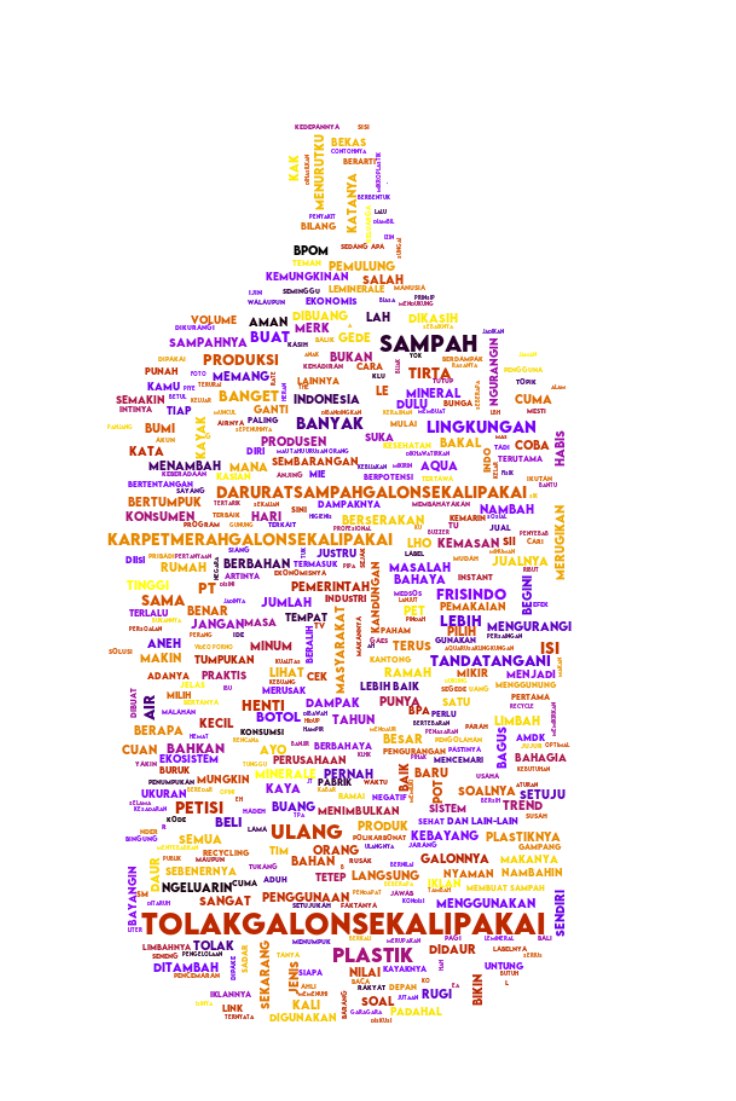

In [32]:
from collections import defaultdict #library dictionary
from wordcloud import WordCloud #visualiasi wordcloud


font = r'C:\Users\hp\font\LEMONMILK-Bold.otf'

data2 = data.copy() #copy data yang telah digabung
data2.dropna(inplace=True) #menghapus missing values
all_word = defaultdict(int) #mengubah data menjadi dict

for i in data2['text']:
    for term in i: #iterasi vaues tiap koma
        all_word[term.strip()] += 1 #menyimpan ke list values setelah koma

genres_cloud = WordCloud(background_color='white', colormap='gnuplot', 
                         font_path=font, mask=bg_pic, max_words=2000,
                         random_state=42, width=bg_pic.shape[1],
                         height=bg_pic.shape[0]).generate_from_frequencies(all_word) #membuat visualisasi wordcloud
plt.figure(figsize=(15,20))
plt.imshow(genres_cloud, interpolation='bilinear')#membaca visualisasi
plt.axis('off')#menyembunyikan axis aa